<table style='border: 3px solid black; width: 100%;'>
    <tr>
        <th style='width: 5%;'>&nbsp;</th>
        <th style='width: 15%;'><img src='../resources/images/amanita_muscaria.png'></th>
        <th><center><h1 style='font-size: 38px;'>[ MUSHROOM Project ]</h1></center></th>
        <th style='width: 5%'>&nbsp;</th>
    </tr>
    <tr>
        <td>&nbsp;</td>
        <td>&nbsp;</td>
        <td>Project type: <span style='color: blue;'><strong>Image Classification</strong></span></td>        
        <td>&nbsp;</td>
    </tr>
    <tr>
        <td>&nbsp;</td>
        <td>&nbsp;</td>
        <td>Autors: </span><strong><span style='color: blue;'>Sabah ABIH</span> / <span style='color: blue;'>Olivier CONSTANTIN</span> / <span style='color: blue;'>David CHARLES-ELIE-NELSON</span></strong></td>
        <td>&nbsp;</td>
    </tr>
</table>

<hr style="border-width: 4px ; border-color: #0C22D7">

# Dataset: oliv: ---( MODELISATION - Hyperparameter Tuning )---</h1></td>

<hr style="border-width: 4px ; border-color: #0C22D7">

# Initialization

## Prerequisites

In [ ]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
# Prerequisites
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

#! pip install keras_tuner

## Import Standard Libraries

In [ ]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
# Import Standard Libraries
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

import os
import sys

'''
# Time
import pytz
from time import time

from tqdm import tqdm

import re
'''
# JSON
import json

# Random
import random
'''
# Numpy
import numpy as np
print('NumPy: ', np.__version__)
'''
# Pandas
import pandas as pd
print('Pandas: ', pd.__version__)
'''
# Scikit-learn
import sklearn as skl
print('Scikit-Learn: ', skl.__version__)
'''
# TensorFlow
import tensorflow as tf
print('TensorFlow: ', tf.__version__)

# Keras Tuner
import keras_tuner as kt
print('Keras Tuner: ', kt.__version__)

# Matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# Seaborn
import seaborn as sns
print('Seaborn: ', sns.__version__)

Pandas:  1.1.5
TensorFlow:  2.5.0
Keras Tuner:  1.0.3
Seaborn:  0.11.1


## Settings

### Modelisation Settings

In [ ]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
# Modelisation Settings
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
'''
# Time
LOCAL_TIMEZONE = pytz.timezone('Europe/Paris')
'''
# --------------------------------------------------------
# ~~~ IMAGE PARAMS ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# --------------------------------------------------------

    # TARGET_COLOR_MODE
    # color_mode
    # possible values: { 'grayscale' | 'rgb' }
    # Whether the images will be converted to have 1 or 3 channels.
TARGET_COLOR_MODE = 'rgb'



# --------------------------------------------------------
# ~~~ MODEL PARAMS ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# --------------------------------------------------------
#
MODEL_NAME = 'EfficientNetB0'

# ~~~ LOSS
MODEL_LOSS = tf.keras.losses.SparseCategoricalCrossentropy(
         name            = 'sparse_categorical_crossentropy'
#    ,   from_logits     = False
#    ,   reduction       = 'auto'
)

# ~~~ METRICS
MODEL_METRICS = [
        tf.keras.metrics.SparseCategoricalAccuracy(name = 'accuracy')
    ,   tf.keras.metrics.SparseTopKCategoricalAccuracy(k = 2, name = 'top_2_accuracy')
    ,   tf.keras.metrics.SparseTopKCategoricalAccuracy(k = 5, name = 'top_5_accuracy')
]

TRANSFER_LEARNING_ORIGIN = 'imagenet'

MODEL_INPUT_PREPROCESSING_FN = None         # None for 'EfficientNetBX' model because the preprocessing is already 
                                            # included in the model


# --------------------------------------------------------
# ~~~ HYPERPARAMETER TUNING ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# --------------------------------------------------------

TUNER_SEED = random.randint(1, 1000)

TUNER_EPOCHS = 5

    # HYPERBAND_MAX_EPOCHS
    # Integer
    # the maximum number of epochs to train one model. 
    # It is recommended to set this to a value slightly higher than the expected epochs to convergence for
    # your largest Model, and to use early stopping during training (for example, via 
    # tf.keras.callbacks.EarlyStopping).
HYPERBAND_MAX_EPOCHS = 5

    # HYPERBAND_FACTOR
    # Integer
    # The reduction factor for the number of epochs and number of models for each bracket. 
HYPERBAND_FACTOR = 3

    # HYPERBAND_ITERATIONS
    # Integer
    # at least 1, the number of times to iterate over the full Hyperband algorithm. 
    # One iteration will run approximately max_epochs * (math.log(max_epochs, factor) ** 2) cumulative epochs
    # across all trials. 
    # It is recommended to set this to as high a value as is within your resource budget. 
HYPERBAND_ITERATIONS = 1

HP_TARGET_IMAGE_SHAPES = [
        ( 64,  64, 3 if (TARGET_COLOR_MODE == 'rgb') else 1)
    ,   (128, 128, 3 if (TARGET_COLOR_MODE == 'rgb') else 1)
    ,   (256, 256, 3 if (TARGET_COLOR_MODE == 'rgb') else 1)
    ,   (512, 512, 3 if (TARGET_COLOR_MODE == 'rgb') else 1)
]


# --------------------------------------------------------
# ~~~ GENUS SELECTION ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# --------------------------------------------------------

GENUS_SELECTION_METHOD = 'TOP_N_COMMON'       # possible values: { 'BY_NAMES' | 'TOP_N_COMMON' }
GENUS_TOP_N_COMMON     = 10                   # number of most popular genus to consider if GENUS_SELECTION_METHOD is 
                                              # set to 'TOP_N_COMMON'
GENUS_NAMES_LIST       = []                   # list that sould contain the genus names to consider if 
                                              # GENUS_SELECTION_METHOD is set to 'BY_NAMES'
MAX_IMAGES_PER_GENUS   = 2000                 # 100 | 500 | 1000 | 2000 | 2500


# --------------------------------------------------------
# ~~~ DATASET PARAMS ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# --------------------------------------------------------
#
# SPLIT
SPLIT_TEST_RATIO  = 0.2
SPLIT_VALID_RATIO = 0.125
SPLIT_SEED_1      = random.randint(1, 1000)
SPLIT_SEED_2      = random.randint(1, 1000)

BATCH_SIZE = 32

# TRAIN BATCH DATASET
DATASET_TRAIN_SEED = random.randint(1, 1000)
DATASET_VALID_SEED = random.randint(1, 1000)

### Path Settings

In [ ]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
# Path Settings
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

class PathSettings():
    
    def __init__(self,
            gdriveMountPoint    = None 
        ,   projectRootPath     = None
        ,   srcPath             = None
        ,   datasourcePath      = None
        ,   datasourceName      = None
        ,   modelOutputRootPath = None
        ,   imageRootDir        = None
    ):
        self.value = dict(
                GOOGLE_DRIVE_MOUNT_POINT = gdriveMountPoint
            ,   PROJECT_ROOT_PATH        = projectRootPath
            ,   SRC_PATH                 = srcPath
            ,   DATASOURCE_PATH          = datasourcePath
            ,   DATASOURCE_NAME          = datasourceName
            ,   MODEL_OUTPUT_ROOT_PATH   = modelOutputRootPath
            ,   IMAGE_ROOT_DIR           = imageRootDir
        )
    
    
    def getSettings(self):
        return self.value

    
    def get(self, pathname):
        if pathname:
            return self.value.get(pathname.upper())
        else:
            return None
        
        
    def add(self, pathname, value, overwrite = False):
        if overwrite is None:
            overwrite = False
        if pathname not in self.getPathnames() or overwrite:
            self.value[pathname.upper()] = value
        else:
            raise KeyError(f'Unable to add the path: pathname "{pathname}" already exists and <overwrite> parameter is set to False.')
            
            
    def getPathnames(self):
        if self.value:
            return self.value.keys()
        else:
            return None
    

# ~~~ Setting paths
#

PATH_SETTINGS = PathSettings(
        gdriveMountPoint    = '/content/drive'
    ,   projectRootPath     = '/content/drive/MyDrive/Mushroom_project'
    ,   srcPath             = '/content/drive/MyDrive/Mushroom_project/repo_git/src'
    ,   datasourcePath      = '/content/drive/MyDrive/work/Oliv'
    ,   datasourceName      = 'mushroomObserver'
    ,   modelOutputRootPath = '/content/drive/MyDrive/work/dad/output'
    ,   imageRootDir        = '/content/drive/MyDrive/work/Oliv/images'
)

#
# Specific initialization for GOOGLE COLAB platform
#
# Import Libraries
from google.colab import drive
# For Google Colab only !
gdriveMountPath = PATH_SETTINGS.get('GOOGLE_DRIVE_MOUNT_POINT')
if gdriveMountPath:
    # Mount the google drive if not already done
    if not os.path.isdir(gdriveMountPath):
        drive.mount(gdriveMountPath)
        print('Google drive mounted !')
else:
    raise Error('Failed to retrieve the Google Drive mount point path !')

## Initialization for Custom Libraries

In [ ]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
# Initialization for Custom Librairies
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

# Retrieving paths
srcDir = PATH_SETTINGS.get('SRC_PATH')

if srcDir and os.path.isdir(srcDir):
    libDir = os.path.join(srcDir, 'lib')
    if libDir not in sys.path:
        sys.path.append(libDir)
        print(f'INFO: Project directory added to PYTHONPATH: {libDir}')
else:
    raise Error('Invalid value for variable <libDir>')

INFO: Project directory added to PYTHONPATH: /content/drive/MyDrive/Mushroom_project/repo_git/src/lib


# Data Loading and pre-processing

## Loading DataFrame

In [ ]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
# Loading DataFrame
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

# Retrieving paths
datasourcePath    = PATH_SETTINGS.get('DATASOURCE_PATH')
datasourceName    = PATH_SETTINGS.get('DATASOURCE_NAME')
#dataframeFilename = 'df_genus.csv'
dataframeFilename = 'df_genus_2k_clean.csv'

csvFilepath = os.path.join(datasourcePath, dataframeFilename)

print('')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('=== Loading GENUS DataFrame ===')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
df_genus = pd.read_csv( \
      filepath_or_buffer = csvFilepath
   ,  sep = ','
   ,  header = 0
)

print('\nDataFrame shape: ')
print(df_genus.shape)
print('\nDataframe info: ')
print(df_genus.info())


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
=== Loading GENUS DataFrame ===
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

DataFrame shape: 
(27080, 39)

Dataframe info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27080 entries, 0 to 27079
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              27080 non-null  int64  
 1   index                   27080 non-null  int64  
 2   obs_id                  27080 non-null  int64  
 3   obs_date                27080 non-null  object 
 4   is_collection_location  27080 non-null  bool   
 5   confidence              26957 non-null  float64
 6   obs_views               27080 non-null  int64  
 7   consensus_id            27080 non-null  int64  
 8   consensus_name          27080 non-null  object 
 9   consensus_rank          27080 non-null  object 
 10  consensus_synonym_id    27080 non-null  int64  
 11  location_id             27080 non-null  int64  
 12

## Genus Selection

In [ ]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
# Genus Selection
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

from datasource.dataframe.genus import selection as sel

print(f'Genus selection method: {GENUS_SELECTION_METHOD}')

# Number of samples in the dataframe at the beginning
begSampleCnt = df_genus.shape[0]

if GENUS_SELECTION_METHOD == 'TOP_N_COMMON':
    if GENUS_TOP_N_COMMON is None:
        raise Error('Variable <GENUS_TOP_N_COMMON> is not set')
    print(f'The model will consider (at most) {GENUS_TOP_N_COMMON} genus')
    # Selecting genus by popularity
    # Keeping the TOP N most famous genus (genus with the most images)
    genusNamesSelection = sel.top_n_famous_genus_names(df_genus, GENUS_TOP_N_COMMON)
elif GENUS_SELECTION_METHOD == 'BY_NAMES':
    genusNamesSelection = GENUS_NAMES_LIST
else:
    raise Error('Invalid value for parameter <GENUS_SELECTION_METHOD>.')
    
# Displaying genus names selection
print('\nGenus selection:')
for i, name in enumerate(genusNamesSelection):
    print('[', i, ']: ', name)

# Filtering dataframe to keep only selected genus
df_genus = sel.genus_filter_by_name(df_genus, genusNamesSelection)

# Number of samples in the dataframe after genus filtering
endSampleCnt = df_genus.shape[0]

# Printing sample counts
print('\nSample count:')
print(f'   initial: {begSampleCnt}')
print(f'   now    : {endSampleCnt}')
if begSampleCnt > 0:
    pctSample = endSampleCnt * 100 / begSampleCnt
    print(f'\nKeep: {round(pctSample, 2)} %')

# Verifying that number of genus names correspond
if df_genus['taxon_name'].nunique() != len(genusNamesSelection):
    print('CAUTION: The dataframe does not contain the expected number of distinct genus names')

print('\nImages per Genus inside dataframe:')
df_genus['taxon_name'].value_counts()

Genus selection method: TOP_N_COMMON
The model will consider (at most) 10 genus

Genus selection:
[ 0 ]:  Amanita
[ 1 ]:  Hygrocybe
[ 2 ]:  Armillaria
[ 3 ]:  Lactarius
[ 4 ]:  Agaricus
[ 5 ]:  Gymnopus
[ 6 ]:  Cortinarius
[ 7 ]:  Russula
[ 8 ]:  Marasmius
[ 9 ]:  Entoloma

Sample count:
   initial: 27080
   now    : 18560

Keep: 68.54 %

Images per Genus inside dataframe:


Amanita        1927
Armillaria     1899
Hygrocybe      1899
Lactarius      1887
Agaricus       1884
Gymnopus       1852
Cortinarius    1837
Russula        1816
Marasmius      1800
Entoloma       1759
Name: taxon_name, dtype: int64

### Recording Class Names

In [ ]:
# Record the label names
CLASS_NAMES = df_genus['taxon_name'].unique()
print('Class Names:')
print(CLASS_NAMES)

NB_CLASSES = len(CLASS_NAMES)
print(f'\nNb Classes: {NB_CLASSES}')

Class Names:
['Agaricus' 'Amanita' 'Armillaria' 'Cortinarius' 'Entoloma' 'Gymnopus'
 'Hygrocybe' 'Lactarius' 'Marasmius' 'Russula']

Nb Classes: 10


## Data Preprocessing

In [ ]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
# Data Preprocessing
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

#from datasource.dataframe.genus import preprocessing as pp

# Doing data preprocessing
#df_genus = pp.preprocessing(df_genus, image_root_dir = None)

# checking data preprocessing
#pp.preprocessing_check(df_genus)

## Splitting Dataset

In [ ]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Split Dataset
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

from datasource.dataframe.genus.selection import split_df_genus

from sklearn.model_selection import train_test_split


print('Splitting Dataframe with settings:')
print(f'   split_test_ratio : {SPLIT_TEST_RATIO}')
print(f'   split_valid_ratio: {SPLIT_VALID_RATIO}')
print(f'              seed_1: {SPLIT_SEED_1}')
print(f'              seed_2: {SPLIT_SEED_2}')

# Splitting the dataset
X_train, X_valid, X_test = split_df_genus(
        df_genus
    ,   test_ratio  = SPLIT_TEST_RATIO
    ,   valid_ratio = SPLIT_VALID_RATIO
    ,   seed1       = SPLIT_SEED_1
    ,   seed2       = SPLIT_SEED_2
)

# Displaying datasets' size
print('\nDisplaying datasets size:')
totalSamples = X_train.shape[0] + X_valid.shape[0] + X_test.shape[0]
print(f'   samples[train]: {X_train.shape[0]}  ({round(X_train.shape[0] * 100 / totalSamples,2)}%)')
print(f'   samples[valid]: {X_valid.shape[0]}  ({round(X_valid.shape[0] * 100 / totalSamples,2)}%)')
print(f'   samples[test ]: {X_test.shape[0]}   ({round(X_test.shape[0]  * 100 / totalSamples,2)}%)')

Splitting Dataframe with settings:
   split_test_ratio : 0.2
   split_valid_ratio: 0.125
              seed_1: 441
              seed_2: 438

Displaying datasets size:
   samples[train]: 12992  (70.0%)
   samples[valid]: 1856  (10.0%)
   samples[test ]: 3712   (20.0%)


## Controlling Images per Genus in TRAIN dataset

This section has been added to ensure that our TRAIN dataset will contain (approximately) the same number of images for each of the different mushroom genus we want our model to consider.

So what is expected on the bar graph displayed below, is that all bars on the graph have the same width whatever the corresponding genus.

That way, we expect that our model will learn to recognize equally each of the genus it has to consider.
In short, we expect a fair learning.

*** Limiting images per Genus ...
max images per genus: 2000
min images per genus (detected): 1231

Dataframe shape:  (12310, 39)
Controlling images per Genus for df_genus dataset:


Graphically:


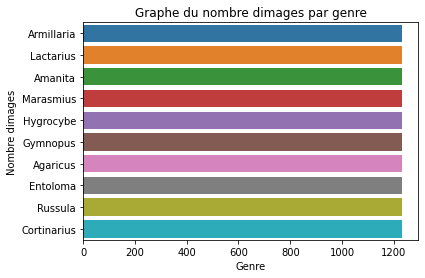


Numerically:
Armillaria     1231
Lactarius      1231
Amanita        1231
Marasmius      1231
Hygrocybe      1231
Gymnopus       1231
Agaricus       1231
Entoloma       1231
Russula        1231
Cortinarius    1231
Name: taxon_name, dtype: int64

min[imagePerGenus]:  1231
max[imagePerGenus]:  1231


Below the first rows of the train dataset:


,img_path,taxon_name
13440,/content/drive/MyDrive/work/Oliv/images_clean/Hygrocybe/409000.jpg,Hygrocybe
13126,/content/drive/MyDrive/work/Oliv/images_clean/Hygrocybe/141346.jpg,Hygrocybe
5610,/content/drive/MyDrive/work/Oliv/images_clean/Armillaria/871265.jpg,Armillaria
3409,/content/drive/MyDrive/work/Oliv/images_clean/Amanita/349420.jpg,Amanita
24730,/content/drive/MyDrive/work/Oliv/images_clean/Russula/151810.jpg,Russula


In [ ]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Controlling Images per Genus in TRAIN dataset
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

from datasource.dataframe.genus.selection import displayImagesPerGenus, limit_images_per_genus

# Limiting number of images per genus and ensuring all genus are fairly represented
limit_images_per_genus(X_train, MAX_IMAGES_PER_GENUS)

# Affichage du nombre d'images par Genus
print('Controlling images per Genus for df_genus dataset:\n')
displayImagesPerGenus(X_train)

# Keeping only the feature (img_path) and the target (taxon_name) on each dataframes
X_train = X_train[['img_path','taxon_name']]
X_valid = X_valid[['img_path','taxon_name']]
X_test  = X_test[['img_path','taxon_name']]

# Displaying the first rows of the train dataset
pd.set_option('display.max_colwidth', None)
print('\nBelow the first rows of the train dataset:')
X_train.head()

# Building Image Dataset

**CAUTION**

---

**EfficientNet** models:  
   The preprocessing logic has been included in the efficientnet model implementation. 
   Users are no longer required to a input_preprocess_input function to normalize the input data. 

---

## Image Generators

### Image Generators Settings

In [ ]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Image Generators Settings
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

AUGMENTED_IMAGE_GENERATOR_OPTS = dict(
        featurewise_center            = False
    ,   samplewise_center             = False
    ,   featurewise_std_normalization = False
    ,   samplewise_std_normalization  = False
    ,   zca_whitening                 = False
#    ,   zca_epsilon                   = 1e-06
    ,   rotation_range                = 90
    ,   width_shift_range             = 0.2
    ,   height_shift_range            = 0.2
    ,   brightness_range              = [0.2, 1.0]
    ,   shear_range                   = 0.2
    ,   zoom_range                    = 0.3
    ,   channel_shift_range           = 0.0
    ,   fill_mode                     = 'constant'
    ,   cval                          = 0.0
    ,   horizontal_flip               = True
    ,   vertical_flip                 = False
#    ,   rescale                       = 1. / 255.
#    ,   preprocessing_function        = MODEL_INPUT_PREPROCESSING_FN     # The preprocessing_function will be incorporated inside the model
#    ,   data_format                   = None
#    ,   validation_split              = 0.0
#    ,   dtype                         = None    
)


NON_AUGMENTED_IMAGE_GENERATOR_OPTS = dict(
#        featurewise_center            = False
#    ,   samplewise_center             = False
#    ,   featurewise_std_normalization = False
#    ,   samplewise_std_normalization  = False
#    ,   zca_whitening                 = False
#    ,   zca_epsilon                   = 1e-06
#    ,   rotation_range                = 0
#    ,   width_shift_range             = 0.0
#    ,   height_shift_range            = 0.0
#    ,   brightness_range              = None
#    ,   shear_range                   = 0.0
#    ,   zoom_range                    = 0.0
#    ,   channel_shift_range           = 0.0
#    ,   fill_mode                     = 'nearest'
#    ,   cval                          = 0.0
#    ,   horizontal_flip               = False
#    ,   vertical_flip                 = False
#    ,   rescale                       = 1. / 255.
#    ,   preprocessing_function        = MODEL_INPUT_PREPROCESSING_FN     # The preprocessing_function will be incorporated inside the model
#    ,   data_format                   = None
#    ,   validation_split              = 0.0
#    ,   dtype                         = None    
)

### Build Image Generators

In [ ]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Build Image Generators
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

def buildImageGenerator(settings):
    if settings is None:
        return tf.keras.preprocessing.image.ImageDataGenerator()
    return tf.keras.preprocessing.image.ImageDataGenerator(**settings)


#TRAIN_IMAGE_GENERATOR_OPTS = AUGMENTED_IMAGE_GENERATOR_OPTS
#VALID_IMAGE_GENERATOR_OPTS = NON_AUGMENTED_IMAGE_GENERATOR_OPTS

TRAIN_IMAGE_GENERATOR_OPTS = AUGMENTED_IMAGE_GENERATOR_OPTS
VALID_IMAGE_GENERATOR_OPTS = None

print('Building image generators ...')
train_datagen = buildImageGenerator(TRAIN_IMAGE_GENERATOR_OPTS)
valid_datagen = buildImageGenerator(VALID_IMAGE_GENERATOR_OPTS)
print('Done.')

Building image generators ...
Done.


# Setting up callbacks

## [callback]: EarlyStopping

**EarlyStopping**

Stop training when a monitored metric has stopped improving.

Assuming the goal of a training is to minimize the loss.  
With this, the metric to be monitored would be 'loss', and mode would be 'min'.  
A model.fit() training loop will check at end of every epoch whether the loss is no longer decreasing, considering the min_delta and patience if applicable.  
Once it's found no longer decreasing, model.stop_training is marked True and the training terminates.

The quantity to be monitored needs to be available in logs dict.  
To make it so, pass the loss or metrics at model.compile().

In [ ]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# [callback] EarlyStopping
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

clbk_earlyStopping = tf.keras.callbacks.EarlyStopping(
        monitor              = 'accuracy'
#    ,   min_delta            = 0
    ,   patience             = 2
    ,   verbose              = 0
    ,   mode                 = 'max'
#    ,   baseline             = None
#    ,   restore_best_weights = False
)

## [callback]: TerminateOnNaN

**TerminateOnNan**

Callback that terminates training when a NaN loss is encountered.

In [ ]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# [callback]: TerminateOnNan
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

clbk_terminateOnNan = tf.keras.callbacks.TerminateOnNaN()

## Declare the callbacks to be used

In [ ]:
modelClbks = [ 
         clbk_earlyStopping
    ,    clbk_terminateOnNan
]

# Preparation

## Determine Model Root Path

In [ ]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Determine Model Root Path
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

modelOutputRootPath = PATH_SETTINGS.get('MODEL_OUTPUT_ROOT_PATH')
modelName           = MODEL_NAME.lower()

if not NB_CLASSES:
    raise ValueError('<NB_CLASSES> not set correctly')
else:
    strNbClasses = str(NB_CLASSES)

if modelOutputRootPath:
    MODEL_ROOT_PATH = os.path.join(modelOutputRootPath, 'classifier', 'multiclass', strNbClasses, modelName)
else:
    raise Exception('Unable to retrieve <MODEL_OUTPUT_ROOT_PATH> path directory')

if MODEL_ROOT_PATH:
    print(f'Model Root Path: {MODEL_ROOT_PATH}')
    # Create the directory ModelRootPath is not already exists
    if not os.path.exists(MODEL_ROOT_PATH):
        os.makedirs(MODEL_ROOT_PATH)
else:
    raise ValueError('<MODEL_ROOT_PATH> is not set correctly')

Model Root Path: /content/drive/MyDrive/work/dad/output/classifier/multiclass/10/efficientnetb0


## Determine Model Id

In [ ]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Determine Model ID
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

def getModelId(modelName, modelRootPath):
    if not modelName:
        raise ValueError('Incorrect value for <modelName> argument: a non empty string is expected')
    if not modelOutputRootPath:
        raise ValueError('Incorrect value for <modelOutputRootPath> argument: a non empty string is expected.')
    if not os.path.isdir(modelRootPath):
        raise FileNotFoundError(f'Directory not found: "{modelRootPath}"')
    modelId = 1
    while True:
        if modelId == 9999:
            raise Error(f'The number of Ids have already been exhausted for this model: {modelName} !')
        strModelId = str(modelId).zfill(4)
        dirPath    = os.path.join(modelRootPath, strModelId)
        if not os.path.isdir(dirPath):
            return strModelId
        modelId += 1
    # Ne devrait jamais etre atteint
    return None

# Retrieve settings
modelRootPath = MODEL_ROOT_PATH
modelName     = MODEL_NAME

# Determine the MODEL_ID for the model
print('Determine the Model Id:')
MODEL_ID = getModelId(modelName, modelRootPath)
print(f'   MODEL_ID: {MODEL_ID}')

# Setting the MODEL_RUN_PATH
MODEL_RUN_PATH = os.path.join(modelRootPath, MODEL_ID)
print(f'   MODEL_RUN_PATH: {MODEL_RUN_PATH}')

# Adding MODEL_RUN_PATH to PATH_SETTINGS
PATH_SETTINGS.add(pathname = 'MODEL_RUN_PATH', value = MODEL_RUN_PATH, overwrite = False)

Determine the Model Id:
   MODEL_ID: 0002
   MODEL_RUN_PATH: /content/drive/MyDrive/work/dad/output/classifier/multiclass/10/efficientnetb0/0002


## Build Arborescence

In [ ]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Build Arborescence
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

def create_dir_if_not_exist(dirPath):
    if isinstance(dirPath, str):
        if len(dirPath) > 0:
            if not os.path.exists(dirPath):
                os.makedirs(dirPath)
                print(f'created: {dirPath}')                

modelName   = MODEL_NAME
modelId     = MODEL_ID
modelRunPath = PATH_SETTINGS.get('MODEL_RUN_PATH')

# Adding TUNER_RUN_PATH to PATH_SETTINGS
TUNER_RUN_PATH = os.path.join(modelRunPath, 'tuner')
PATH_SETTINGS.add(pathname = 'TUNER_RUN_PATH', value = TUNER_RUN_PATH, overwrite = False)

# Create arborescence for model outputs
#
print('\nCreating arborescence for the model...')
print(f'   model name    : {modelName}')
print(f'   model Id      : {modelId}')
print(f'   model run path: {modelRunPath}')

modelName = modelName.lower()

subDirs = [
        'tuner'
    ,   TUNER_RUN_PATH
    ,   'best'
]

if modelRunPath:
    if not os.path.isdir(modelRunPath):
        create_dir_if_not_exist(modelRunPath)
    for subDir in subDirs:
        create_dir_if_not_exist(os.path.join(modelRunPath, subDir))
else:
    raise ValueError('Variable not set: <modelRunPath>')
print('Done.\n')


Creating arborescence for the model...
   model name    : EfficientNetB0
   model Id      : 0002
   model run path: /content/drive/MyDrive/work/dad/output/classifier/multiclass/10/efficientnetb0/0002
created: /content/drive/MyDrive/work/dad/output/classifier/multiclass/10/efficientnetb0/0002
created: /content/drive/MyDrive/work/dad/output/classifier/multiclass/10/efficientnetb0/0002/tuner
created: /content/drive/MyDrive/work/dad/output/classifier/multiclass/10/efficientnetb0/0002/best
Done.



# Model Hyperparameters Tuning

## Define hyperparameters

In [ ]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Define hyperparameters
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

hp = kt.HyperParameters()

# Pooling
hp.Choice(
      name          = 'pooling'
   ,  values        = [ 'flatten', 'max', 'avg' ]
   ,  ordered       = False
   ,  default       = None
   ,  parent_name   = None
   ,  parent_values = None
)


# Number of dense layers
hp.Int(
      name          = 'num_dense_layers'
   ,  min_value     = 1
   ,  max_value     = 5
   ,  step          = 1
   ,  sampling      = None
   ,  default       = None
   ,  parent_name   = None
   ,  parent_values = None
)


# Number of neurons for each dense layer
hp.Choice(
      name          = 'dense_units'
   ,  values        = [ 32, 64, 128, 512, 1024 ]
   ,  ordered       = True
   ,  default       = None
   ,  parent_name   = None
   ,  parent_values = None
)


# Activation function for each dense layer
hp.Choice(
      name          = 'dense_activation'
   ,  values        = [ 'ReLU', 'LeakyReLU' ]
   ,  ordered       = False
   ,  default       = None
   ,  parent_name   = None
   ,  parent_values = None
)


# Dense Weights Initializer
hp.Choice(
      name          = 'dense_weigths_initializer'
   ,  values        = [ 'GlorotNormal', 'GlorotUniform', 'RandomNormal', 'RandomUniform' ]
   ,  ordered       = False
   ,  default       = None
   ,  parent_name   = None
   ,  parent_values = None
)


# Dense Biaises Initializer
hp.Fixed(
      name  = 'dense_biases_initializer'
   ,  value = 'Zeros'
)

# Dense use BatchNormalization
hp.Choice(
      name          = 'dense_use_batchnorm'
   ,  values        = [ 1, 0 ]
   ,  ordered       = True
   ,  default       = None
   ,  parent_name   = None
   ,  parent_values = None
)

# DropoutRate
hp.Float(
      name          = 'dropout_rate'
   ,  min_value     = 0.0
   ,  max_value     = 0.6
   ,  step          = 0.1
   ,  sampling      = None
   ,  default       = None
   ,  parent_name   = None
   ,  parent_values = None
)


# Classifier activation
hp.Fixed(
      name  = 'classifier_activation'
   ,  value = 'softmax'
)


# Learning rate
hp.Float(
        name          = 'learning_rate'
    ,   min_value     = 1e-6
    ,   max_value     = 1e-2
    ,   sampling      = 'LOG'
)


# Optimizer
hp.Choice(
        name          = 'optimizer'
    ,   values        = [ 'sgd', 'rmsprop', 'adam', 'adamax' ]
    ,   ordered       = False
    ,   default       = None
    ,   parent_name   = None
    ,   parent_values = None
)

print('Hyperparameters defined: [ OK ]')

Hyperparameters defined: [ OK ]


## Search for the best Hyperparameters

In [ ]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Search for the best Model
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

from modelisation.hypermodels.HyperTransferLearningModel import HyperTransferLearningModel
from tensorflow.keras.applications import EfficientNetB0 as baseModelFn

#from tensorflow.keras.applications.xception import preprocess_input as XceptionPPFn

IMAGE_ROOT_DIR = PATH_SETTINGS.get('IMAGE_ROOT_DIR')

tuners  = []
context = dict(
        image_root_dir   = IMAGE_ROOT_DIR
    ,   nb_classes       = NB_CLASSES
    ,   model_name       = MODEL_NAME
    ,   image_generators = {
                'train': TRAIN_IMAGE_GENERATOR_OPTS
            ,   'valid': VALID_IMAGE_GENERATOR_OPTS
        }
    ,   per_tuner = []
)

# Iteration over all input image shapes we want to consider
for id, inputShape in enumerate(HP_TARGET_IMAGE_SHAPES):

    # Hypermodel settings
    hyperModelSettings = dict(
           nbClasses         = NB_CLASSES
        ,  inputShape        = inputShape
        ,  modelName         = MODEL_NAME
        ,  baseModelParams   = dict( weights = 'imagenet' )
        ,  freezeBaseModel   = True
        ,  modelLoss         = MODEL_LOSS
        ,  modelMetrics      = MODEL_METRICS
        ,  verbose           = True
    )
    
    #
    # ~~~ Instanciate an Hyper Model
    #
    print('\nInstanciate an Hyper Model...')
    hyperModel = HyperTransferLearningModel(
            baseModelFn       = baseModelFn
        ,   inputPreprocessFn = MODEL_INPUT_PREPROCESSING_FN
        ,   **hyperModelSettings
    )
    print('Done.')
    
    #
    # ~~~ Instanciate a Tuner
    #
    # Next, let's instantiate a tuner.
    # You should give him the hyperparameter combinations that should be tested.    
    # You should specify:
    #    - the model-building function
    #    - the name of the objective to optimize 
    #      (whether to minimize or maximize is automatically inferred for built-in metrics)
    #    - the total number of trials (max_trials) to test
    #    - and the number of models that should be built and fit for each trial (executions_per_trial).

    tuner_id = str(id).zfill(4)

    tunerSettings = dict(
            tune_new_entries     = False
        ,   allow_new_entries    = False
        ,   objective            = 'val_accuracy'
        ,   max_epochs           = HYPERBAND_MAX_EPOCHS
        ,   factor               = HYPERBAND_FACTOR
        ,   hyperband_iterations = HYPERBAND_ITERATIONS
        ,   seed                 = TUNER_SEED
        ,   tuner_id             = tuner_id
        ,   project_name         = tuner_id
        ,   directory            = TUNER_RUN_PATH
    )

    tuner = kt.Hyperband(
            hypermodel      = hyperModel
        ,   hyperparameters = hp
        ,   **tunerSettings
    )

    tuners.append(tuner)    
    
    #
    # ~~~ Batch Datasets Settings
    #
    # TRAIN
    TRAIN_BATCH_DATASET_OPTS = dict(
            directory          = IMAGE_ROOT_DIR
        ,   x_col              = 'img_path'
        ,   y_col              = 'taxon_name'
        ,   weight_col         = None
        ,   target_size        = inputShape[0:2]
        ,   color_mode         = TARGET_COLOR_MODE
        ,   classes            = None
        ,   class_mode         = 'sparse'
        ,   batch_size         = BATCH_SIZE
        ,   shuffle            = True 
        ,   seed               = DATASET_TRAIN_SEED
        ,   save_to_dir        = None
        ,   save_prefix        = None
        ,   save_format        = 'jpg'
        ,   subset             = None
    #    ,   interpolation      = 'bilinear'
        ,   validate_filenames = False
    )
    
    # VALID
    VALID_BATCH_DATASET_OPTS = dict(
            directory          = IMAGE_ROOT_DIR
        ,   x_col              = 'img_path'
        ,   y_col              = 'taxon_name'
        ,   weight_col         = None
        ,   target_size        = inputShape[0:2]
        ,   color_mode         = TARGET_COLOR_MODE
        ,   classes            = None
        ,   class_mode         = 'sparse'
        ,   batch_size         = BATCH_SIZE
        ,   shuffle            = True
        ,   seed               = DATASET_VALID_SEED
        ,   save_to_dir        = None
        ,   save_prefix        = None
        ,   save_format        = 'jpg'
        ,   subset             = None
    #    ,   interpolation      = 'bilinear'
        ,   validate_filenames = False
    )

    #
    # ~~~ Build the batch datasets
    #    
    print('\nBuild batch datasets ...')
    
    # TRAIN dataset    
    train_batch_ds = train_datagen.flow_from_dataframe(
            dataframe = X_train
        ,   **TRAIN_BATCH_DATASET_OPTS
    )
    print('[TRAIN] batch dataset: built !')

    # VALID dataset
    valid_batch_ds = valid_datagen.flow_from_dataframe(
            dataframe = X_valid
        ,   **VALID_BATCH_DATASET_OPTS
    )
    print('[VALID] batch dataset: built !')
        
    #
    # ~~~ Print dataset Information
    #
    target_size = TRAIN_BATCH_DATASET_OPTS.get('target_size')
    colorMode   = TRAIN_BATCH_DATASET_OPTS.get('color_mode')
    if colorMode:
        colorMode = colorMode.lower()
    channels = 3 if colorMode == 'rgb' else 1
    print('\n~~~ Dataset Information ~~~~')
    print(f' - input shape       : {(target_size[0], target_size[1], channels)}')
    print(f' - dataset batch size: {train_batch_ds.batch_size}')
    print(f' - dataset samples   : {train_batch_ds.samples}')

    context['per_tuner'].append(
        dict(
                tuner_settings   = tunerSettings
            ,   split = {
                        'test_ratio' : SPLIT_TEST_RATIO
                    ,   'valid_ratio': SPLIT_VALID_RATIO
                    ,   'seed_1': SPLIT_SEED_1
                    ,   'seed_2': SPLIT_SEED_2
                }
            ,   dataset_settings = {
                        'train': TRAIN_BATCH_DATASET_OPTS
                    ,   'valid': VALID_BATCH_DATASET_OPTS
                }
        )
    )

    #
    # ~~~ Start the search
    #
    # The library search function performs the iteration loop, which evaluates a certain number of 
    # hyperparameter combinations. 
    # Evaluation is performed by computing the trained model's accuracy on a held-out validation set.
    print('\nStart the search...\n')
    tuner.search(
            x                   = train_batch_ds
        ,   steps_per_epoch     = train_batch_ds.samples // train_batch_ds.batch_size
        ,   epochs              = TUNER_EPOCHS
        ,   validation_data     = valid_batch_ds
        ,   validation_steps    = valid_batch_ds.samples // valid_batch_ds.batch_size
        ,   callbacks           = modelClbks
        ,   max_queue_size      = 10
        ,   workers             = 4
        ,   use_multiprocessing = False
        ,   verbose             = 1
    )
    print('Search ended.')

Trial 10 Complete [00h 32m 37s]
val_accuracy: 0.26131466031074524

Best val_accuracy So Far: 0.5307112336158752
Total elapsed time: 03h 21m 35s
INFO:tensorflow:Oracle triggered exit
Search ended.


# Back up Tuners Context

In [ ]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Back up Tuners Context
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

dstPath  = os.path.join(MODEL_RUN_PATH)

dstFilePath = os.path.join(dstPath, 'context.json')
with open(dstFilePath, 'w') as outFile:
    json.dump(context, outFile)
print(f'Tuners context successfully exported to:\n{dstFilePath}')

Tuners context successfully exported to:
/content/drive/MyDrive/work/dad/output/classifier/multiclass/10/efficientnetb0/0002/context.json


# Display Tuner Search Space

In [ ]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Display Tuner Search Space
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# The search space will be the same for all tuners from the tuners list.
# So we will display here only the search space for the first tuner

if len(tuners) > 0 and tuners[0]:
    print('+~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    print('| Tuner Search Space')
    print('+~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    print('')
    tuner = tuners[0]
    tuner.search_space_summary()
else:
    print('Unable to display the tuner search space: no valid tuner found inside <tuners> list')

+~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
| Tuner Search Space
+~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Search space summary
Default search space size: 11
pooling (Choice)
{'default': 'flatten', 'conditions': [], 'values': ['flatten', 'max', 'avg'], 'ordered': False}
num_dense_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 5, 'step': 1, 'sampling': None}
dense_units (Choice)
{'default': 32, 'conditions': [], 'values': [32, 64, 128, 512, 1024], 'ordered': True}
dense_activation (Choice)
{'default': 'ReLU', 'conditions': [], 'values': ['ReLU', 'LeakyReLU'], 'ordered': False}
dense_weigths_initializer (Choice)
{'default': 'GlorotNormal', 'conditions': [], 'values': ['GlorotNormal', 'GlorotUniform', 'RandomNormal', 'RandomUniform'], 'ordered': False}
dense_biases_initializer (Fixed)
{'conditions': [], 'value': 'Zeros'}
dense_use_batchnorm (Choice)
{'default': 1, 'conditions': [], 'values': [1, 0], 'ordered': True}
dropout_rate (Float)
{'default': 0.0, 'conditio

# Analyzing tuners results

## Hyperparameters tuning results for each tuner

In [ ]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Hyperparameters tuning results for each tuner
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

print('Find below the hyperparameters tuning results for each tuner:')

# For each tuner
for i, tuner in enumerate(tuners):
    
    print('')
    print('+~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    print('f| Tuner[{i}]: Hyperparameters tuning results')
    print('+~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    print('')
    # Display tuning results summary.
    tuner.results_summary()    
    # The method prints a summary of the search results including the hyperparameter values and evaluation 
    # results for each trial

Find below the hyperparameters tuning results for each tuner:

+~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
f| Tuner[{i}]: Hyperparameters tuning results
+~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Results summary
Results in /content/drive/MyDrive/work/dad/output/classifier/multiclass/10/efficientnetb0/0002/tuner/0000
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
pooling: max
num_dense_layers: 3
dense_units: 1024
dense_activation: LeakyReLU
dense_weigths_initializer: RandomNormal
dense_biases_initializer: Zeros
dense_use_batchnorm: 1
dropout_rate: 0.6000000000000001
classifier_activation: softmax
learning_rate: 0.00019490796019912997
optimizer: rmsprop
tuner/epochs: 5
tuner/initial_epoch: 2
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 606a0cfcdffb7faf9a6c022b7028b101
Score: 0.3044181168079376
Trial summary
Hyperparameters:
pooling: max
num_dense_layers: 2
dense_units: 128
dense_activation: ReLU
dense_weigths_initializer

## Get all trials with their associated scores

In [ ]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Get all trials with their associated scores
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

import keras_tuner.engine.trial as trial_lib

trials = list()

if tuners:

    # Retrieve all trials
    trials = [
        dict(
               tuner_id        = tuner.tuner_id
            ,  trial_id        = trial.trial_id
            ,  score_name      = tuner.oracle.objective.name
            ,  score_direction = tuner.oracle.objective.direction
            ,  score           = trial.score
            ,  hyperparameters = trial.hyperparameters.values
        )
        for tuner in tuners
        for trial in tuner.oracle.trials.values()
        if trial.status == trial_lib.TrialStatus.COMPLETED
    ]

print(f'Retrieved: {len(trials)} trials from {len(tuners)} tuners')

Retrieved: 40 trials from 4 tuners


## Identify the objective for the score

In [ ]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Identify the objective for the score
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# Create a dataframe from the trial array
data = pd.DataFrame(trials)

# Identify all objectives over all the tuners 
objectives = data[['score_name', 'score_direction']].value_counts()

# They should be only one objective ... but ... if they are many we will only consider the first one
score_name, score_direction = objectives.index.values[0]

print('Score that will be considered:')
print(f'   name   : {score_name}')
print(f'   best is: {score_direction}')

Score that will be considered:
   name   : val_accuracy
   best is: max


## Graph all trials scores

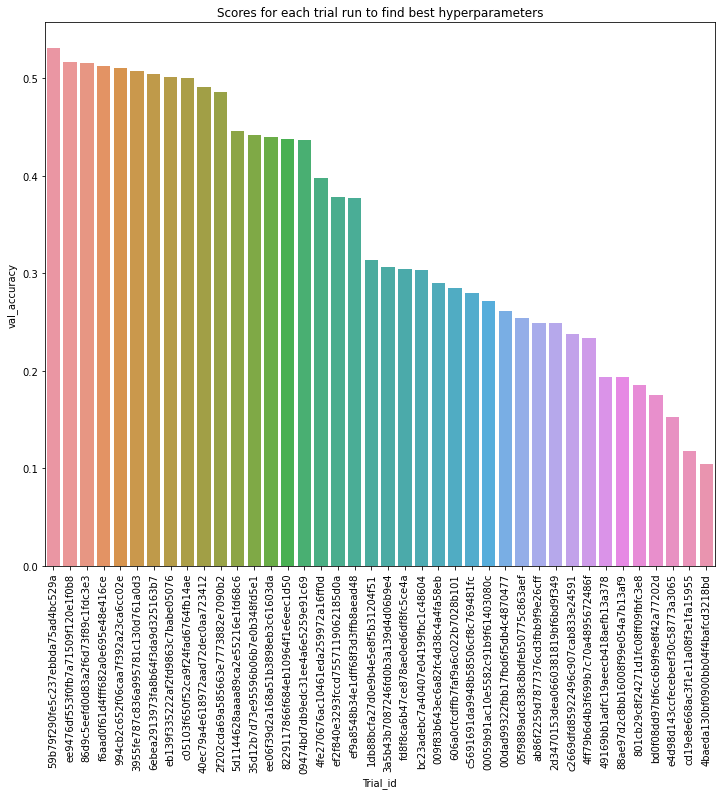

In [ ]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Graph all trials scores
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

data = data[ data['score_name'] == score_name ]

plt.figure(figsize=(12, 10))
sns.barplot(
        x     = 'trial_id'
    ,   y     = 'score'
    ,   data  = data
    ,   order = data.sort_values('score', ascending = score_direction == 'min')['trial_id']
)
plt.title('Scores for each trial run to find best hyperparameters')
plt.xlabel('Trial_id')
plt.ylabel(score_name)
plt.xticks(rotation=90)
plt.show()

## Identify the best trial

In [ ]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Identify the best trial
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

trials = data.sort_values('score', ascending = score_direction == 'min').iloc[0]

print('Best trial info:')
print('~~~~~~~~~~~~~~~')
best_trial = trials.drop(labels=['hyperparameters'], inplace = False).to_dict()
print(json.dumps(best_trial, indent = 3))

print('')
print('Best corresponding hyperparameters:')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
best_hp = trials['hyperparameters']
print(json.dumps(best_hp, indent = 3))

Best trial info:
~~~~~~~~~~~~~~~
{
   "tuner_id": "0003",
   "trial_id": "59b79f290fe5c237ebbda75ad4bc529a",
   "score_name": "val_accuracy",
   "score_direction": "max",
   "score": 0.5307112336158752
}

Best corresponding hyperparameters:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
{
   "pooling": "avg",
   "num_dense_layers": 2,
   "dense_units": 1024,
   "dense_activation": "ReLU",
   "dense_weigths_initializer": "GlorotNormal",
   "dense_biases_initializer": "Zeros",
   "dense_use_batchnorm": 1,
   "dropout_rate": 0.1,
   "classifier_activation": "softmax",
   "learning_rate": 0.002291766085305541,
   "optimizer": "sgd",
   "tuner/epochs": 5,
   "tuner/initial_epoch": 2,
   "tuner/bracket": 1,
   "tuner/round": 1,
   "tuner/trial_id": "6ebea2913973fa8b64f3da9d325163b7"
}


# Back up results

## Back up the best trial

In [ ]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Backup the best trail
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

dstPath = os.path.join(MODEL_RUN_PATH, 'best')

# Best Trial
filename = 'best_trial.json'
dstFilePath = os.path.join(dstPath, filename)
with open(dstFilePath, 'w') as outFile:
    json.dump(best_trial, outFile)
print(f'Best trial successfully exported to file:\n{dstFilePath}')

Best trial successfully exported to file:
/content/drive/MyDrive/work/dad/output/classifier/multiclass/10/efficientnetb0/0002/best/best_trial.json


## Back up the best hyperparameters

In [ ]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Backup the best hyperparameters
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

dstPath = os.path.join(MODEL_RUN_PATH, 'best')

# Best HP
filename = 'best_hyperparameters.json'
dstFilePath = os.path.join(dstPath, filename)
with open(dstFilePath, 'w') as outFile:
    json.dump(best_hp, outFile)
print(f'Best hyperparameters successfully exported to file:\n{dstFilePath}')

Best hyperparameters successfully exported to file:
/content/drive/MyDrive/work/dad/output/classifier/multiclass/10/efficientnetb0/0002/best/best_hyperparameters.json


## Back up the best model

In [ ]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Backup the best model
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

dstPath = os.path.join(MODEL_RUN_PATH, 'best')

# Retrieving the best model
tuner_id = int(best_trial['tuner_id'])
tuner = tuners[tuner_id]
trial = tuner.oracle.get_trial(best_trial['trial_id'])
model = tuner.load_model(trial)

# Display model summary
model.summary()

# Back up the model
dstFilePath = os.path.join(dstPath, 'model', 'best_model.h5')
model.save(dstFilePath)
print(f'Best model successfully exported to file:\n{dstFilePath}')

Building model: EfficientNetB0
[INFO]: Building the base model with the following parameters:
{'weights': 'imagenet', 'include_top': False, 'input_tensor': <KerasTensor: shape=(None, 512, 512, 3) dtype=float32 (created by layer 'input_1')>, 'pooling': None}
[INFO]: successfully loaded base model: "efficientnetb0"
   output layer units: 10
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 512, 512, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 512, 512, 3

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Best model successfully exported to file:
/content/drive/MyDrive/work/dad/output/classifier/multiclass/10/efficientnetb0/0002/best/model/best_model.h5
